# Introduction to Neural Networks and Deep Learning
## Contents
1. Historical background
2. The Perceptron Algorithm
3. Adaptive Linear Neurons (ADALINE)  
    3.1. Batch gradient descent
4. Feature scaling
5. Large-scale ML and stochastic gradient descent  
    5.1. Mini-batch gradient descent

# Historical background
Deep learning is an approach to AI that consists in computers to learn from experience and understand the world in terms of a hierarchy of concepts, each of which is defined in terms of its relation to simpler concepts. If we draw a graph showing how these concepts are built on top of each other, we would obtain a deep graph with many layers, that's why we call it **deep learning**. In order to behave intelligently, computers need to capture the knowledge people have about the world, much of which is subjective, intuitive and difficult to articulate formally. 

There have been several approaches to get this informal knowledge into a computer:
1. **Knowledge base:** hard-code knowledge into statements using formal languages. A computer can reason about these statements using logical inference rules.
2. **Classic machine learning:** it allows computer to acquire their own knowledge by extracting patterns from raw data. The performance of ML algorithms (e.g. Logistic Regression, Naive Bayes...) depends on the **representation** of the data they work with. Unfortunately, for many tasks, it is difficult to know what features should be extracted.
3. **Representation learning:** use ML to discover not only the mapping from representation to output but also the representation itself. An example of a representation learning algorithm is the **autoencoder** (a combination of an encoder and a decoder). When designing features our goal is usually to separate the **factors of variation** that explain the observed data. Such factors typically are unobserved objects or forces in the physical world that affect observable quantities.
4. **Deep learning:** extracting high-level features from raw data (e.g. the speaker's accent from a raw audio) can be difficult in some cases. Deep learning solves this problem by representing the world as a hierarchy of concepts, each of which is defined in relation to simpler concepts, and more abstract representations computed in terms of less abstract ones. An example is the *multilayer perceptron* (MLP).

Deep learning dates back to the 1940s, going through different names through the years: **cybernetics** (1940s-1960s), **connectionsim** (1980s-1990s), **deep learning** (beginning in 2006). Some of the earliest learning algorithms aimed to be computational models of biological learning (how the brain works). This is why we hear about **artificial neural networks** (ANNs). Neural networks are generally not designed to realistically model biological functions, even if they are systems inspired by the biological brain (which provides a proof by example that intelligent behavior is achievable. The term deep learning goes beyond the neuroscientific perspective, appealing instead to a more general principle of learning multiple levels of composition.

- 1943: McCulloch-Pitts Neuron. It was an early model of brain function where the weights of the function mapping inputs to outputs needed to be manually set.
- 1958: Rosenblatt's perceptron algorithm. The first model that could learn the weights.
- 1960: Adaptive Linear Element (ADALINE).

Linear models have many limitations, for instance, they can't learn the XOR function. This was the major dip in the neural networks' popularity.
- 1975: Cognitron. A model inspired from our knowledge of brain functions.
- 1980: Neocognitron. It will later become the basis for the modern convolutional networks.

In the 1980s, a movement called connectionism emerged in the context of cognitive science. The basic idea is to have many simple computational units that become intelligent by interacting with each other.
- 1986: the back-propagation algorithm starts to gain popularity.
- 1987: long short-term (LSTM) memory network. It aimed to modeling long sequences with neural networks. It is widely used today for many sequence modeling problems (e.g. natural language processing).

In the mid 1990s, neural networks' popularity started its decline, due to the advance of other fields of machine learning (e.g. Kernel machines and graphical models both achieved good results on many tasks). Deep networks was believed to be very difficult to train with the hardware available at the time. The third wave of neural networks research began in 2006.
- 2006: deep belief network. A kind of neural network that can be efficiently trained using a strategy called *greedy layer-wise pre-training*.

From that moment, the term *deep learning* began to gain popularity. The third wave began with a focus on new unsupervised learning techniques and their ability to generalize well from small datasets, but today the interest is on older supervised learning algorithms and the ability of deep models to leverage large labeled datasets.

Two crucial factors that led to today's success of neural networks are the increase in the size of the datasets used to train them, and the increase of computational power (faster CPUs, general purpose GPUs, better software infrastructure for distributed computing), allowing models to grow in size in terms of connections per neuron (matching in some cases the number of connections per neuron of mammalian brains, such as mice or cats) and number of hidden layers. As scale and accuracy of deep networks has increased, so has the complexity of the problems that they can solve. Deep learning extends also to other domains, for example the domain of *reinforcement learning*.

# The perceptron algorithm
The perceptron algorithm belongs to the category of classification algorithms, and it is the basis of a neural network. The first concept of the perceptron learning rule was published by Frank Rosenblatt in 1957, and it was based on the McCullock-Pitts (MCP) neuron model: a concept of a simplified brain cell, published by Warren McCullok and Walter Pitts in 1943. Neurons are interconnected brain cells in the brain; McCullock and Pitts described such a nerve cell as a simple logic gate with binary outputs; multiple signals arrive at the dendrites, are then integrated into the cell body, and, if the accumulated signals exceeds a certain threshold, an output signal is generated that will be passed on by the axon.

<img src="images/Perceptron/neuron.png" style="width:30%"/>

We can pose this problem as a binary classification task where we refer to the two classes as 1 (positive class) and -1 (negative class). Then there is an **activation function** $\phi(z)$ that takes a linear combination of certain input vector $\bf{x}$ and a corresponding weight vector $\bf{w}$, where $z=w^\top x = w_1x_1+...+w_mx_m$ is called the net input.

In the perceptron algorithm, the activation function $\phi(z)$ is a variant of the unit step function:

$$\phi(z)=\begin{cases}1 & \text{if }z\ge \theta \\ -1 & \text{otherwise}\end{cases}$$

We can bring the threshold $\theta$ to the left side of the equation and define $w_0=-\theta$ and $x_0=1$, so that $z=w^\top x$ and we can write:

$$\phi(z)=\begin{cases}1 & \text{if }z\ge 0 \\ -1 & \text{otherwise}\end{cases}$$

The weight $w_0=-\theta$ is usually called the **bias unit**.

<img src="images/Perceptron/perceptron_schema.jpg" style="width:40%"/>

For instance, in $\mathbb{R}^2$ we would have:
$$w = \begin{bmatrix}w_0 \\ w_1 \\ w_2\end{bmatrix} \qquad x= \begin{bmatrix}1 \\ x_1 \\ x_2\end{bmatrix}$$

with $w^\top x = w_1x_1 + w_2x_2 + w_0= 0$ being a line in $\mathbb{R}^2$.

## The algorithm
```python
Initialize w_0...w_m to 0 or to small random values
for each misclassified Input:
    if prediction = 0:
        for i=0...m:
            w_i = w_i + learn_rate * x_i
    if prediction = 1:
        for i=0...m:
            w_i = w_i - learn_rate * x_i
```

This process is iterated until a termination condition is reached (e.g. the average error of the i-th iteration is less than a user-specified threshold) or for a certain number of iteration.

In a more general way, the update term for the j-th weight $w_j$ is calculated by the perceptron learning rule:

$$\Delta w_j = \eta \left(y^{(i)}-\hat{y}^{(i)}\right)x_j^{(i)}$$

where:
- $\eta \in (0,1)$ is the learning rate
- $y^{(i)}$ is the true class label of the i-th training sample
- $\hat{y}^{(i)}$ is the predicted class label
- $x_j^{(i)}$ is the j-th component of the i-th input vector

Note that all the weights are updated simultaneously, meaning that the predicted label $\hat{y}^{(i)}$ is not recomputed before all of the weights are updated. Note also that if a point gets correctly classified, then $y^{(i)}-\hat{y}^{(i)}=0$ and so it will not lead to any variation of the weights.

### Example in $\mathbb{R}^2$
In $\mathbb{R}^2$, the input vector $x$ has 2 components (plus the component $x_0=1$ to account for the bias term). The main idea behind this algorithm is to start from an initial line, let's say $-10+3x_1+4x_2=0$ (in this case $w^\top=\left[-10, 3, 4\right]$) and consider a misclassified point, let it be $(4,5)$. First we add a bias term to the point that will become $(1,4,5)$, then we multiply its components for a learning rate $\eta$, let's say $\eta=0.1$, and we subtract it to the equation of the line, obtaining $(-10-0.1)+(3-0.4)x_1+(4-0.5)x_2+=0$ that is $-10.1+2.6x_1+3.5x_2=0$ which is **a line that is closer to the original point**. On the contrary, a point that is correctly classified will not influence the line in any way.

Note that the convergence of the algorithm is only guaranteed if the two classes are linearly separable and the learning rate is sufficiently small, otherwise we can set a maximum number of **epochs** (iterations on the training set).

## Perceptrons as Logical Operators
The perceptron algorithm can be used to reproduce the behavior of logical ports. In particular, we can combine multiple neurons (logical ports) in a network in order to obtain more complex logical functions.

**Note:** only linear function can be implemented using the perceptron. For example, we can not implement a XOR logic gate.

In the following code snippet, we'll implement a logical AND port using a perceptron.

In [17]:
# Load imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [18]:
# Set weight1, weight2, and bias
weight1 = 1.0
weight2 = 1.0
bias = -2.0

# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                  -2.0                    0          Yes
       0          1                  -1.0                    0          Yes
       1          0                  -1.0                    0          Yes
       1          1                   0.0                    1          Yes


## Implementing the Perceptron

In [19]:
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def net_input(X, W):
    return np.dot(X, W[1:]) + W[0]

def prediction(X, W):
    return np.where(net_input(X, W) >= 0.0, 1, -1)

# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, learn_rate = 0.01):
    error = 0
    for xi, target in zip(X, y):
        update = learn_rate * (target - prediction(xi, W))
        W[1:] += update * xi
        W[0] += update
        error += int(update != 0.0)
    return W, error
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.random.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    # These are the solution lines that get plotted below.
    boundary_lines = []
    errors = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, error = perceptronStep(X, y, W, learn_rate)
        boundary_lines.append(W)
        errors.append(error)
    return boundary_lines, errors

### Visualize the training set

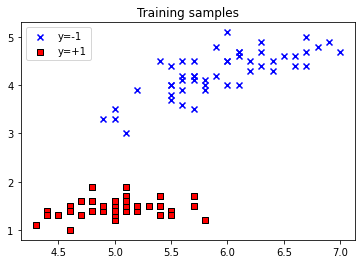

In [20]:
# Iris dataset (linearly separable data)
df = pd.read_csv('datasets/generic/iris.csv', header=None)

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

"""
# Not linearly separable data
data = pd.read_csv('datasets/perceptron_data.csv', header=None)
X = data.iloc[:,[0,1]].to_numpy()
y = data.iloc[:,2].to_numpy()
y = np.where(y == 0, -1, 1)
"""
# Plot the data
plt.scatter(X[y==1,0], X[y==1,1], color='blue', marker='x', label='y=-1')
plt.scatter(X[y==-1,0], X[y==-1,1], color='red', marker='s', label='y=+1', edgecolor='black')
plt.legend(loc='upper left')
plt.title('Training samples')
plt.show()

### Train the perceptron algorithm and visualize the result

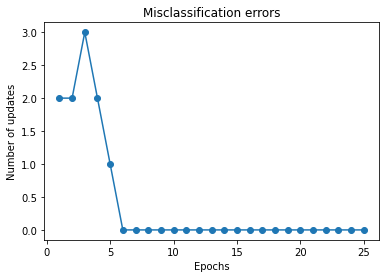

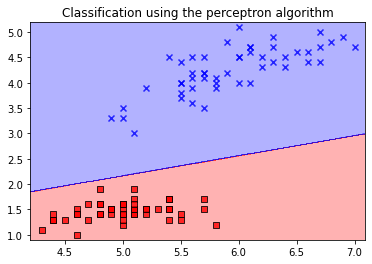

In [21]:
# Utility function to plot the decision regions
def plot_decision_regions(X, y, W, resolution=0.01):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = prediction(np.array([xx1.ravel(), xx2.ravel()]).T, W)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.title('Classification using the perceptron algorithm')
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=cl,
            edgecolor='black')
        
# train the data
lines, errors = trainPerceptronAlgorithm(X, y)

# plot the misclassification error for each epoch
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Misclassification errors')
plt.show()

# plot decision regions
plot_decision_regions(X, y, lines[-1])

# Adaptive linear neurons (Adaline)
Another type of single-layer neural network is the Adaptive Linear Neuron (**Adaline**), published by Bernard Widrow in 1960. The main difference with the Perceptron is that the weights are updated based on a *linear activation function* rather than a unit step function (which is still used as a threshold function to make the final prediction). This linear activation function is the **identity function** of the net input, so that:

$$\phi\left(w^Tx\right)=w^Tx$$

- **Adaline**: compares the true class labels with the linear activation function's continuous valued ouput to compute the errors.
- **Perceptron**: compares the true class labels to the predicted ones to compute the errors.

<img src="images/Perceptron/adaline.jpg" style="width:40%"/>

The key factor is an **objective function** that is to be optimized. In this case, the objective function is a cost function, defined as the **sum of squared errors (SSE)** between the predicted output and the true label:

$$J(w)=\frac{1}{2}\sum_{i}{\left(y^{(i)}-\phi\left(z^{(i)}\right)\right)^2}$$

The main advantage of using a continous linear activation function, in contrast to the unit step function, is that the cost function becomes differentiable and convex. We can minimize that cost function using **gradient descent**, updating, at each step, the weights by taking a step in the opposite direction of the gradient $\nabla J(w)$ of the cost function $J(w)$ computed in $w$:

$$w:= w+\Delta w$$

where $\Delta w$ is defined as the negative gradient multiplied by the hyperparameter $\eta$ (the learning rate):

$$\Delta w=-\eta\nabla J(w)$$

Let's now compute the gradient of the loss function $J(w)$.

$$\begin{align}
    \frac{\partial J}{\partial w_j} &= \frac{\partial}{\partial w_j} \frac{1}{2}\sum_{i}{\left(y^{(i)}-\phi\left(z^{(i)}\right) \right)^2} \\
    &= \frac{1}{2} \sum_{i} 2\left(y^{(i)}-\phi\left(z^{(i)}\right)\right) \frac{\partial}{\partial w_j}\left(y^{(i)}-\phi\left(z^{(i)}\right)\right) \\
    &= \sum_{i} \left(y^{(i)}-\phi\left(z^{(i)}\right)\right) \frac{\partial}{\partial w_j}\left(y^{(i)}-\mathbf{w}^\top x^{(i)}\right) \\
    &= \sum_{i} \left(y^{(i)}-\phi\left(z^{(i)}\right)\right) \left(-x_j^{(i)}\right) \\
    &= -\sum_{i} \left(y^{(i)}-\phi\left(z^{(i)}\right)\right) x_j^{(i)} \\
\end{align}$$

leading to:

$$\Delta w_j=-\eta \frac{\partial J}{\partial w_j}=\eta \sum_{i} \left(y^{(i)}-\phi \left(z^{(i)}\right)\right)x_j^{(i)}$$

The general gradient descent algorithm proceeds as follows:

```python
Initialize (w_0...w_m) to 0 or to small random values
until termination condition do:
    Δw = 0
    for each (x,y) in the training_set do:
        output = phi(w.T * x) # where phi(z) = z
        for each w_i do:
            Δw_i = Δw_i + eta*(y - output)*x_i
    for each w_i do:
        w_i = w_i + Δw_i

```


**Observation:** The weight update is calculated based on all examples in the training dataset (instead of updating the weights incrementally after each training example), which is why this approach is also referred to as **batch gradient descent**.

**Observation:** Consider a classification problem in $\mathbb{R}^2$. Similarly to the Perceotron, a wrongly classified point will make the line moving towards itself. Anyway, differently from the Perceptron, a correctly classified point will influence the line to move further from the point itself because the prediction used to tune the weight $\hat{y}^{(i)}=w^\top x^{(i)}$ is continuous, and it has not yet been  discretized by the quantizer. 

**Observation:** Differently from the Perceptron, Adaline converges ***asymptotically*** even if the data is not linearly separable.

In [22]:
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def net_input(X, W):
    return np.dot(X, W[1:]) + W[0]

# This useless function is here to explicit the activation function 
def activation(X):
    return X

def prediction(X, W):
    return np.where(activation(net_input(X, W)) >= 0.0, 1, -1)

# The function should receive as inputs the data X, the labels y,
# the weights W (as an array that includes also the bias term w_0)
# update the weights W, according to the adaline algorithm,
# and return W.
def adalineStep(X, y, W, learn_rate = 0.01):
    net_input_ = net_input(X, W)
    output = activation(net_input_)
    errors = (y - output)
    W[1:] += learn_rate * X.T.dot(errors)
    W[0] += learn_rate * errors.sum()
    cost = (errors**2).sum() / 2.0
    return W, cost

# This function runs the adaline algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
def trainAdalineAlgorithm(X, y, learn_rate = 0.0005, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.random.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    # These are the solution lines that get plotted below.
    boundary_lines = []
    costs = []
    for i in range(num_epochs):
        # In each epoch, we apply the adaline step.
        W, cost = adalineStep(X, y, W, learn_rate)
        boundary_lines.append(W)
        costs.append(cost)
    return boundary_lines, costs

### Train Adaline and visualize the result

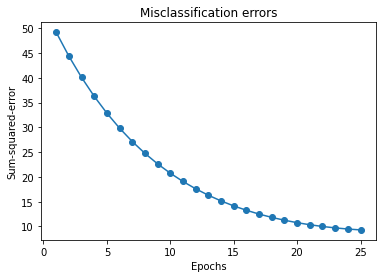

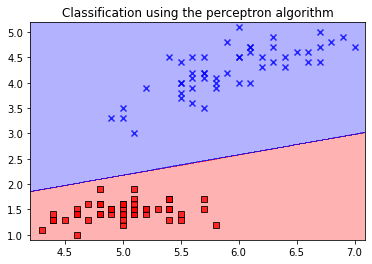

In [23]:
# train the data
lines, costs = trainAdalineAlgorithm(X, y)

# plot the misclassification error for each epoch
plt.plot(range(1, len(costs) + 1), costs, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Misclassification errors')
plt.show()
# plot decision regions
plot_decision_regions(X, y, lines[-1])

**Observation:** choosing a learning rate that is too big (e.g. 0.01), may lead to a continuously increasing error. We can easily visualize it by choosing `learn_rate = 0.01` and plotting the `costs` vector on a semilog plot.

# Feature scaling
Many optimization algorithms benefit from feature scaling methods. Gradient descent is one of them, and we can improve its performance by using ***standardization***, giving our data the properties of a standard normal distribution: *zero-mean* and *unit variance*. Doing that will allow the optimizer to go through fewer steps to find a good solution.

To **standardize the *j*th feature**, we can subract the sample mean $\mu_j$ from every training example and divide it by its standard deviation $\sigma_j$:

$$x_j' = \frac{x_j-\mu_j}{\sigma_j}$$

where $x_j$ is a vector containing the values of the *j*th feature for all the $n$ traning examples

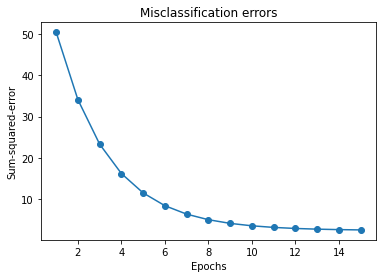

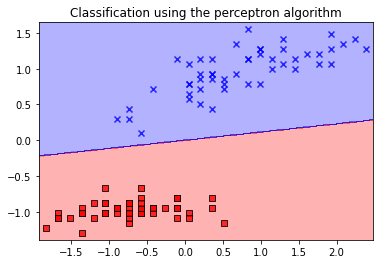

In [24]:
# standardize the data
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

# train the data
lines, costs = trainAdalineAlgorithm(X_std, y, learn_rate=0.01, num_epochs=15)

# plot the misclassification error for each epoch
plt.plot(range(1, len(costs) + 1), costs, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Misclassification errors')
plt.show()
# plot decision regions
plot_decision_regions(X_std, y, lines[-1])

# Large-scale ML and stochastic gradient descent
Suppose that we have a very large dataset, containing millions of entries. Batch gradient descent can be computationally high costly since we need to reevaluate the whole training set each time we take a step towards the global minimum.
At this point, an alternative to the batch gradient descent comes to our help: the **stochastic gradiend descent (SGD)** also called incremental GD.

Instead of updating the weights based on the sum of the accumulated errors over all the training examples, weights are incrementally updated for each training example:

$$\Delta w = \eta\left(y^{(i)}-\phi(z^{(i)})\right)x^{(i)}$$

The algorithm is the following:

```python
Initialize (w_0...w_m) to 0 or to small random values
until termination condition do:
    for each (x,y) in the training_set do:
        output = phi(w.T * x) # where phi(z) = z
        Δw = eta*(y - output)*x
        w = w + Δw
```

Note that SGD doesn't reach the global minimum but an area very close to it. One advantage of SGD is that it can be used for **online learning**, where the model is trained and updated as new training data comes.

**Observation:** More satisfying results can be obtained via SGD by presenting training data in random order; also, we want to shuffle the training set for every epoch to prevent cycles.

The main differences with the batch gradient descent are:
- in SGD, weights are updated more frequently
- SGD can speed up convergence and it is less sensitive to local minima in $J$ (that is not the case of ADALINE, since in this case $J$ is convex)
- if $\eta$ is small enough then SGD can approximate batch gradient descent arbitrarily closely

### Dynamic learning rate
Instead of using a fixed, chosen a priori, learning rate, $\eta$ is often replaced by a learning rate that decreases over time, for example:

$$\eta = \frac{c_1}{[\text{number of iterations}] + c_2}$$

where $c_1$ and $c_2$ are constants.

### Mini-batch gradient descent
Mini-batch learning can be thought as applying batch gradient descent to smaller subsets of the training data. The convergence is reached faster than with the batch gradient descent because of the frequent weight updates. Furthermore, mini-batch learning allows us to replace the `for` loop over the training examples in SGD with vectorized operations (for example, implementing a weighted sum via a dot product), which can improve the computational efficiency.


In [25]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1: # if it is a batch
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

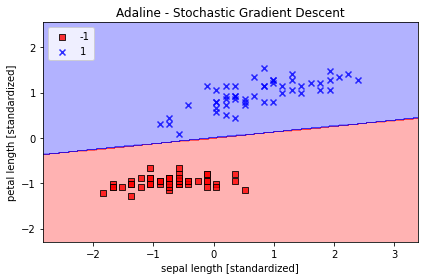

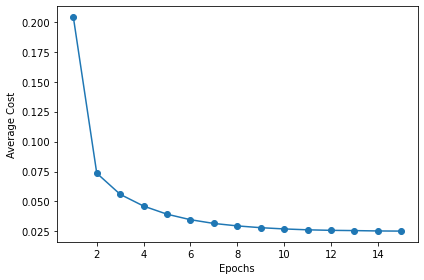

In [26]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # classify each point of the meshgrid
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

# Train Adaline with stochastic gradient descent
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
plt.show()

In an online learning scenario, we could call the `partial_fit` method on individual training examples, for instance `ada_sgd.partial_fit(X_std[0, :], y[0])`